What is the most optimal skills to learn for data analyst

Methodology
1- Find percentage of jobs postings for each skill.
2- Plot a graph where Median salary vs percent skill demand.
3- Coloring the skills according to their respective technology.

In [30]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [31]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [32]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [33]:
skill_limit = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

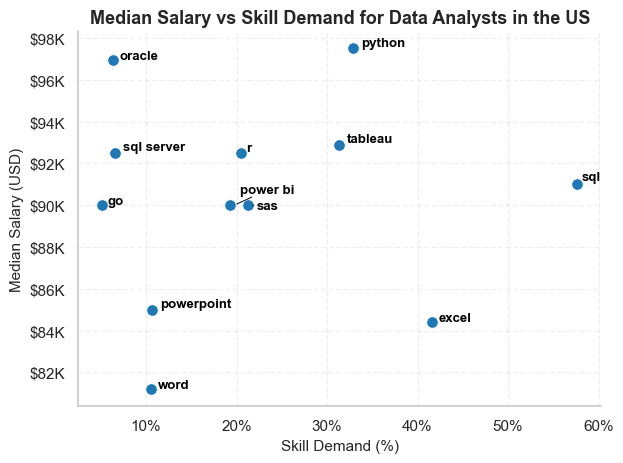

In [34]:
from adjustText import adjust_text
import seaborn as sns
import matplotlib.pyplot as plt

# Clean white background
sns.set_theme(style='whitegrid')

# Scatter plot
sns.scatterplot(
    data=df_DA_skills_high_demand,
    x='skill_percent',
    y='median_salary',
    s=70,           # point size
    color='#1f77b4' # a clean blue color
)

# Titles and labels
plt.title('Median Salary vs Skill Demand for Data Analysts in the US', fontsize=13, weight='bold')
plt.xlabel('Skill Demand (%)', fontsize=11)
plt.ylabel('Median Salary (USD)', fontsize=11)

# Format the axis ticks
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))

# ✅ Create and collect text labels in a list for adjust_text
texts = []
for skill, row in df_DA_skills_high_demand.iterrows():
    t = plt.text(
        x=row['skill_percent'] + 0.5,   # small right offset
        y=row['median_salary'],
        s=skill,
        fontsize=9.5,
        color='black',
        weight='bold'
    )
    texts.append(t)  # Add label to list

# ✅ Adjust overlapping labels automatically
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.7))

# Clean look
sns.despine()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
#Now we will convert the dict like strings in job_type_skills into real dictionary
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['cognos',
  'looker',
  'datarobot',
  'word',
  'spss',
  'ms access',
  'tableau',
  'sharepoint',
  'esquisse',
  'ssrs',
  'sap',
  'alteryx',
  'excel',
  'power bi',
  'powerpoint',
  'sas',
  'dax',
  'sheets',
  'nuix',
  'qlik',
  'powerbi',
  'visio',
  'msaccess',
  'splunk',
  'outlook',
  'ssis',
  'spreadsheet',
  'microstrategy'],
 'programming': ['c',
  'r',
  'vb.net',
  't-sql',
  'rust',
  'haskell',
  'typescript',
  'fortran',
  'go',
  'solidity',
  'php',
  'lisp',
  'c#',
  'crystal',
  'perl',
  'shell',
  'nosql',
  'c++',
  'kotlin',
  'html',
  'python',
  'elixir',
  'delphi',
  'ocaml',
  'sas',
  'dart',
  'matlab',
  'mongodb',
  'scala',
  'vba',
  'groovy',
  'objective-c',
  'f#',
  'visualbasic',
  'java',
  'sql',
  'clojure',
  'swift',
  'lua',
  'julia',
  'assembly',
  'pascal',
  'javascript',
  'erlang',
  'bash',
  'no-sql',
  'ruby',
  'apl',
  'powershell',
  'golang',
  'sass',
  'visual basic',
  'cobol',
  'mongo',
  '

In [36]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,cognos
0,analyst_tools,looker
0,analyst_tools,datarobot
0,analyst_tools,word
0,analyst_tools,spss
...,...,...
9,sync,ringcentral
9,sync,google chat
9,sync,slack
9,sync,microsoft teams


In [37]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,100000.0,0.022989,libraries,theano
170,1,65000.0,0.022989,programming,typescript
171,1,147500.0,0.022989,cloud,vmware
172,1,65000.0,0.022989,webframeworks,vue


In [38]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

In [39]:
df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


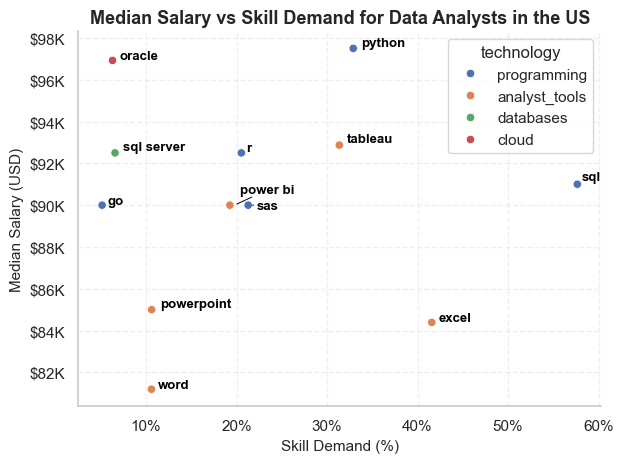

In [44]:
from adjustText import adjust_text
import seaborn as sns
import matplotlib.pyplot as plt

# Clean white background
sns.set_theme(style='whitegrid')

# Scatter plot
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)




# Titles and labels
plt.title('Median Salary vs Skill Demand for Data Analysts in the US', fontsize=13, weight='bold')
plt.xlabel('Skill Demand (%)', fontsize=11)
plt.ylabel('Median Salary (USD)', fontsize=11)

# Format the axis ticks
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))

# ✅ Create and collect text labels in a list for adjust_text
texts = []
for skill, row in df_DA_skills_high_demand.iterrows():
    t = plt.text(
        x=row['skill_percent'] + 0.5,   # small right offset
        y=row['median_salary'],
        s=skill,
        fontsize=9.5,
        color='black',
        weight='bold'
    )
    texts.append(t)  # Add label to list

# ✅ Adjust overlapping labels automatically
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.7))

# Clean look
sns.despine()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()